In [1]:
import tensorflow as tf

# Display the version
print(tf.__version__)

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.18.0


In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

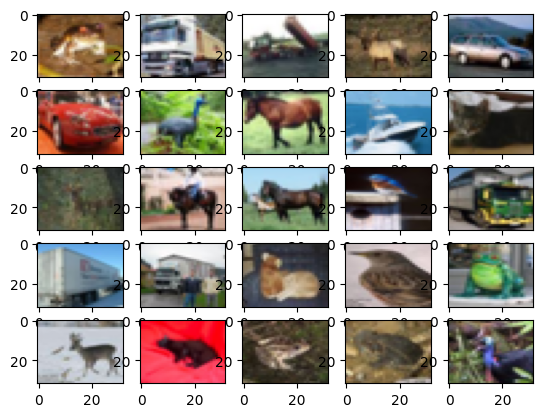

In [4]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()

In [5]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

number of classes: 10


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

In [6]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

In [7]:
# Fit
r = model.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.4554 - loss: 1.7233 - val_accuracy: 0.5351 - val_loss: 1.4496
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6874 - loss: 0.8938 - val_accuracy: 0.6813 - val_loss: 0.9526
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7573 - loss: 0.7063 - val_accuracy: 0.7703 - val_loss: 0.6706
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8010 - loss: 0.5747 - val_accuracy: 0.7723 - val_loss: 0.6772
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8309 - loss: 0.4892 - val_accuracy: 0.7813 - val_loss: 0.6713


In [8]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
			steps_per_epoch=steps_per_epoch, epochs=5)

Epoch 1/5
   4/1562 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7878 - loss: 0.5486 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7628 - loss: 0.7002 - val_accuracy: 0.7542 - val_loss: 0.7611
Epoch 2/5
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8750 - loss: 0.4542

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.8750 - loss: 0.4542 - val_accuracy: 0.7540 - val_loss: 0.7549
Epoch 3/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7840 - loss: 0.6284 - val_accuracy: 0.7793 - val_loss: 0.6763
Epoch 4/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - accuracy: 0.8750 - loss: 0.4904 - val_accuracy: 0.7779 - val_loss: 0.6800
Epoch 5/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7998 - loss: 0.5842 - val_accuracy: 0.7923 - val_loss: 0.6227


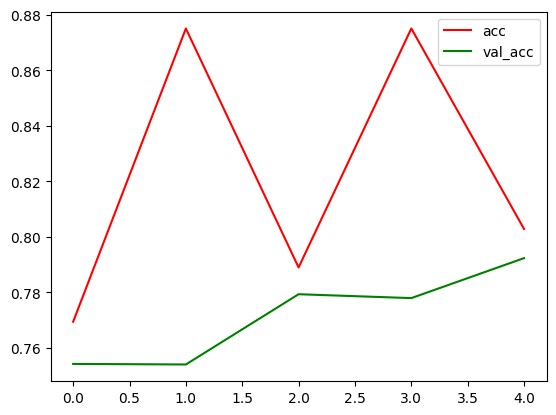

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step
Original label is airplane and predicted label is airplane


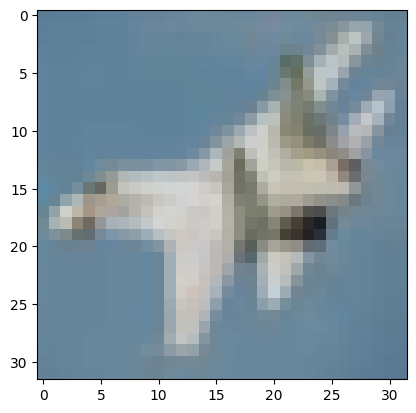

In [10]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 10

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))

In [11]:
# save the model
model.save('CIFAR_10_tens.h5')

# Activity: call the trained model (.h5 file) to classify a new image from diffrent dataset to check the generalization of the trained model...

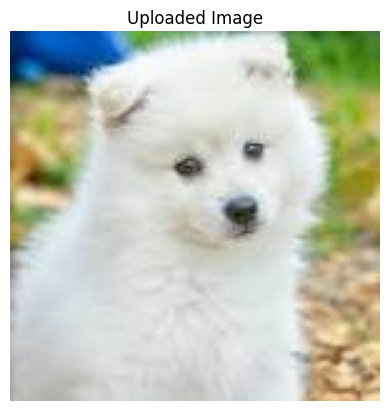

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Original label is airplane and predicted label is frog


In [14]:
import cv2

# Load the image
img_path = "re-test-fig.jpeg"
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display

# Display the image
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Uploaded Image")
plt.show()

# Resize image to match model input size (if needed)
img_resized = cv2.resize(img_rgb, (32, 32))  # Resize to 32x32 for CIFAR-10-like models
img_array = np.array(img_resized)
img_array = img_array.astype("float32") / 255.0  # Normalize

# Reshape it for model input
p = img_array.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


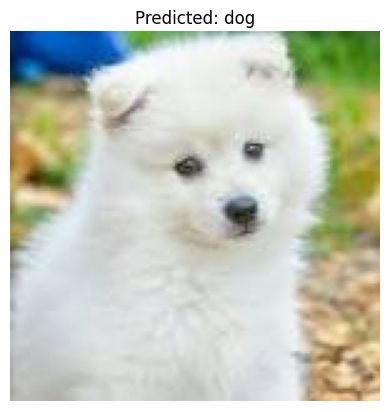

Predicted label: dog


In [16]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model_path = "CIFAR_10_tens.h5"  # Ensure the file is in your working directory
model = load_model(model_path)

# Define CIFAR-10 labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load a new image from a different dataset
image_path = "re-test-fig.jpeg"  # Replace with your test image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
img_resized = cv2.resize(img_rgb, (32, 32))  # Resize to model input size

# Normalize the image
img_array = img_resized.astype("float32") / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
predicted_class = model.predict(img_array).argmax()
predicted_label = labels[predicted_class]

# Display the image and prediction
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Predicted: {predicted_label}")
plt.show()

print(f"Predicted label: {predicted_label}")